<a href="https://colab.research.google.com/github/crescent98/machinelearning35911/blob/master/assginment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
from mpl_toolkits import mplot3d

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

***Objective Function***

In [0]:
def j_objective(m,theta0,theta1,x_point,y_point):
  sum=0
  for i in range(0,m):
    sum=sum+np.square(theta1*x_point[i]+theta0-y_point[i])
  return sum/(2*m)

***Functions for Gradient Descent***

In [0]:
def next_0(theta0,theta1,a,m,x_point,y_point):
  new_0=0
  sum=0
  for i in range(0,m):
    sum=sum+theta1*x_point[i]+theta0-y_point[i]
  new_0=theta0-((a*sum)/m)
  return new_0

In [0]:
def next_1(theta0,theta1,a,m,x_point,y_point):
  new_1=0
  sum=0
  for i in range(0,m):
    sum=sum+(theta1*x_point[i]+theta0-y_point[i])*x_point[i]
  new_1=theta1-((a*sum)/m)
  return new_1

***Size of Gradient***

In [0]:
def gradient(m,theta0,theta1, x_point,y_point):
  sum0=0
  sum1=0
  for i in range(0,m):
    sum0=sum0+theta1*x_point[i]+theta0-y_point[i]
  for i in range(0,m):
    sum1=sum1+(theta1*x_point[i]+theta0-y_point[i])*x_point[i]
  return np.sqrt((np.square(sum0)+np.square(sum1))/m)

In [0]:
path="data.csv"

In [0]:
data=np.genfromtxt(path,delimiter=',')

In [0]:
x_data=data[:,0]

In [0]:
y_data=data[:,1]

In [22]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

***Plot of set of points that are loaded from 'data.csv' file***

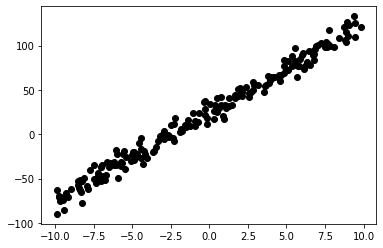

In [29]:
plt.scatter(x_data,y_data,c='#000000')

In [0]:
plt.show()